# 나와 닮은 연예인 찾기

[(98, 758, 284, 572)]


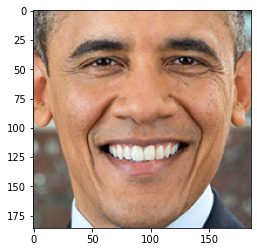

In [1]:
import face_recognition
import os

image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/obama.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

%matplotlib inline
import matplotlib.pyplot as plt

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

In [2]:
#이미지 경로를 입력하면 얼굴 좌표 반환 하는 함수
def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

In [3]:
image_path = 'celebrity/'
dir_path = 'celebrity'

In [4]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
# face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [5]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

In [6]:
embedding_dict = get_face_embedding_dict(dir_path)
# update dic
#embedding_dict.update(get_face_embedding_dict('img_path'))

In [15]:
embedding_dict.update(get_face_embedding_dict('grop_img'))

In [7]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [8]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [9]:
def get_nearest_face(name, top=6):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(1, top):
        if sorted_faces[i]:
            print('순위 {}  이름 : {}  거리 : {}'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
    
    return sorted_faces, sort_key_func

In [10]:
for item in embedding_dict.items():
    print(item[0])

기성용
이동휘
사쿠라
브래들리 쿠퍼
아이즈원김채원
조원희
김상호
황병국
비니
제프리 힌턴
저스틴 존슨
이대형
티모시 달튼
박찬호
박항서
스윙스
톰 홀랜드
유재석
개리
이준혁
박휘순
잭 니콜슨
이승기
슈가
박신양
정민철
채연
리아
수호
온앤오프효진
주호민
이안 굿펠로우
정우성
개코
조정석
이희준
레오나르도 디카프리오
아이즈원조유리
트와이스미나
박희순
윤아
마크 러팔로
매드클라운
존 파브르
유해진
세훈
잭 스페이더
아이유
리암 니슨
최양락
김윤석
슬리피
하현우
김고은
이종석
bush
홍구
케빈 스페이시
이용진
김민재
심수창
하승진
윤균상
이성민
다니엘 크레이그
철면수심
유리
박찬욱
오재원
최민식
이제훈
트와이스나연
클린트 이스트우드
이말년
한석규
백현
이민호
윤도현
고창석
최무성
박명수
배성우
숀 코네리
이천수
정국
최현석
차범근
trump
트와이스사나
차두리
김경진
승희
진
수지
clinton
유희열
박정민
이연걸
정형돈
나인뮤지스경리
레드벨벳웬디
박용택
biden
박서준
택연
손흥민
류현진
전소미
장성호
트와이스쯔위
여자아이들수진
이영하
조정치
아이린
잭 블랙
씨잼
로다주
류준열
주진모(올드)
공효진
내사진2
이재용
지드래곤
찬열
차승원
방시혁
크리스탈
강미나
안재홍
손예진
시우민
박보검
제이크 질렌할
박건우
제이콥 배털론
대도서관
박완규
김학범
레인보우재경
잇지유나
황정민
윤경신
드웨인 존슨
이근대위
류진
장원준
b1a4진영
트와이스모모
제니
첸
김래원
김희철
신동엽
태연
줄리엔강
온앤오프와이엇
서현진
박재범
김남주
김연우
트와이스다현
태양
카이
민니
이승철
한기범
최준석
조달환
지민(BTS)
이범수
서강준
지코
지수
강동원
강민경
김C
박보영
정수빈
벤 에플렉
김대중
문별
잇지예지
뷔
슬기
송중기
이효리
이광수
김광현
권태원
온앤오프라운
도지한
곽도원
꽈두룹
손호준
아이즈원민주
장도연
디오
잇섭
서장훈
크리스 에반스
로제
러블리즈예인
티파니
앤드류 응
조인성
봉준호
이명박
류승범
박해일
박진영
정준하
이대호
목진화
마동석
리사
성룡
지호
딕헌터
obama


In [19]:
sorted_faces, key = get_nearest_face('내사진',top=10)

순위 1  이름 : 내사진2  거리 : 0.24041199730197743
순위 2  이름 : 하현우  거리 : 0.39010315355475794
순위 3  이름 : 최양락  거리 : 0.40975367379342303
순위 4  이름 : 성시경  거리 : 0.41242758869223894
순위 5  이름 : 목진화  거리 : 0.41792000094805576
순위 6  이름 : 윤균상  거리 : 0.42663495424280046
순위 7  이름 : 김경진  거리 : 0.42722355842134196
순위 8  이름 : 마동석  거리 : 0.4403789228149247
순위 9  이름 : 박휘순  거리 : 0.44206027834799233


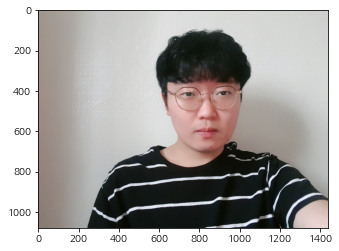

In [16]:
my_image = 'grop_img/내사진.jpg'
plt.imshow(face_recognition.load_image_file(my_image))

In [20]:
import matplotlib.font_manager as fm

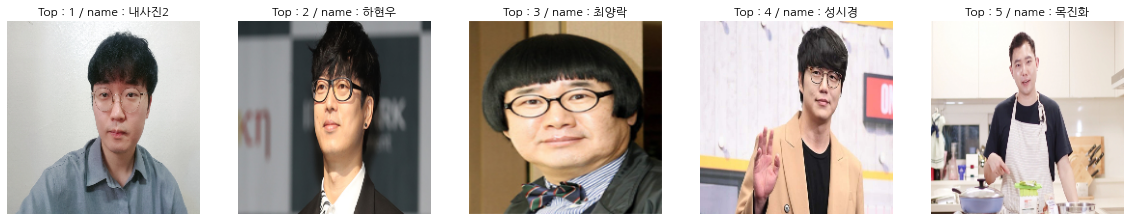

In [21]:
from matplotlib import rc
import cv2
image_path = 'celebrity/'
rc('font', family="NanumGothic")
plt.figure(figsize=(20,20))
for idx, image_ in enumerate(sorted_faces[1:6]):
    plt.subplot(1,5,idx+1)
    image = image_path + image_[0] + '.jpg'
    result = face_recognition.load_image_file(image)
    resized = cv2.resize(result, (200, 200))
    plt.imshow(resized)
    title = 'Top : {} / name : {}'.format(idx+1, image_[0])
    plt.title(title, fontdict={'color':'black'})
    plt.axis('off')